In [1]:
!pip install tensorflow


In [7]:
import tensorflow as tf

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from tensorflow import keras 
(X_train,y_train), (X_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 55s 5us/step


In [15]:
X_train.shape

(60000, 28, 28)

In [17]:
X_train[0].shape

(28, 28)

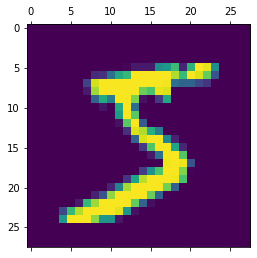

In [18]:
plt.matshow(X_train[0])

In [19]:
y_train[0]

5

In [20]:
X_train = X_train / 255
X_test = X_test / 255

In [21]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [23]:
X_train_flattened.shape

(60000, 784)

In [24]:
X_train_flattened[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Very simple neural network with no hidden layers

In [25]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4676 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 2s 989us/step - loss: 0.3032 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 2s 839us/step - loss: 0.2832 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 1s 785us/step - loss: 0.2735 - accuracy: 0.9229
Epoch 5/5
1875/1875 [==============================] - 1s 788us/step - loss: 0.2666 - accuracy: 0.9258


In [26]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 889us/step - loss: 0.2664 - accuracy: 0.9261


[0.266426146030426, 0.9261000156402588]

In [27]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.87896490e-02, 5.49407275e-07, 7.01233149e-02, 9.58319366e-01,
       2.66960263e-03, 1.05950445e-01, 2.40709278e-06, 9.99865651e-01,
       1.08743101e-01, 7.06179976e-01], dtype=float32)

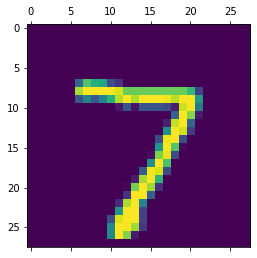

In [28]:
plt.matshow(X_test[0])

In [29]:
np.argmax(y_predicted[0])

7

In [30]:
y_predicted_labels=[np.argmax(i) for i in y_predicted ]

In [32]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [33]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [34]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    1,    0,    5,    6,    4,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   5,    8,  935,   15,    7,    2,   11,   10,   35,    4],
       [   4,    0,   20,  918,    0,   23,    2,   13,   23,    7],
       [   1,    1,    5,    1,  907,    0,   11,    4,   10,   42],
       [  11,    3,    5,   34,   11,  765,   15,    9,   31,    8],
       [  14,    3,    9,    1,    7,   10,  909,    2,    3,    0],
       [   1,    5,   21,    7,    4,    0,    0,  960,    4,   26],
       [   9,   10,    7,   19,    9,   22,    9,   12,  871,    6],
       [  11,    7,    1,   10,   25,    5,    0,   24,    6,  920]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

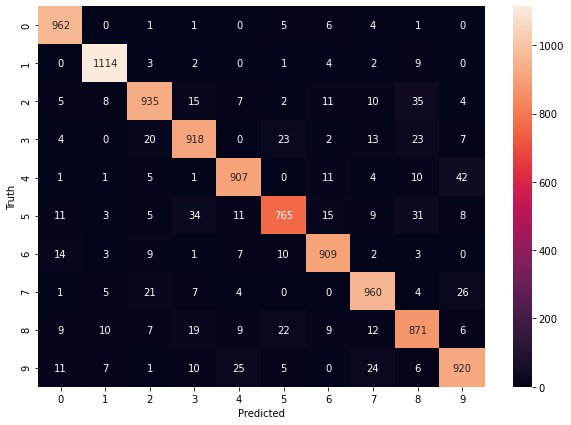

In [35]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using hidden layer

In [37]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4199 - accuracy: 0.8933
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2051 - accuracy: 0.9406
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1536 - accuracy: 0.9557
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1218 - accuracy: 0.9645
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1006 - accuracy: 0.9711


In [38]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1077 - accuracy: 0.9667


[0.10770894587039948, 0.96670001745224]

Text(69.0, 0.5, 'Truth')

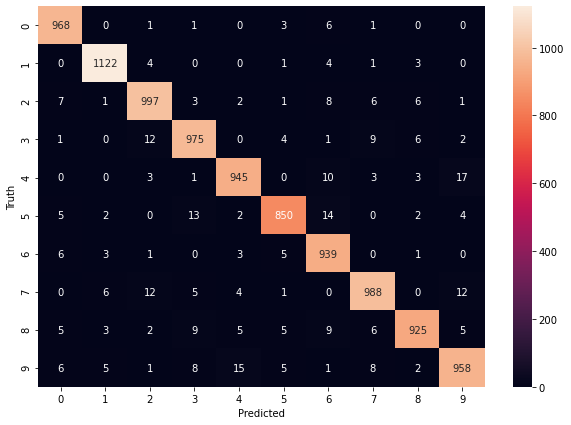

In [39]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using flatten layer


In [40]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2719 - accuracy: 0.9225
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1244 - accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0883 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0663 - accuracy: 0.9802
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0528 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0413 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0330 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0275 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0231 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.017

In [41]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1035 - accuracy: 0.9740


[0.10347702354192734, 0.9739999771118164]